In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8','column 9','column 10','column 11','column 12']
df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\incomplete\Incomplete Datasets Without Labels\4-gauss\4-gauss_AE_1.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12
0,-0.360190,0.16134,0.067351,3.53370,0.469590,0.67908,3.43440,2.79240,2.77630,1.69910,3.815600,1.746400
1,-0.098505,-0.17857,2.062800,2.92160,0.424720,1.17850,1.68020,1.38880,3.21670,2.92360,0.772910,0.641450
2,-0.169460,0.50153,2.470900,3.06500,1.567600,1.48240,0.92160,2.64240,1.51870,2.53180,2.432800,1.876800
3,-0.136050,0.47279,0.588090,1.95630,2.787000,2.59570,2.89330,1.53750,0.99942,3.65930,0.618250,3.265800
4,0.098830,0.23418,0.429700,1.63120,3.554100,2.27110,0.37425,2.17860,1.31400,1.06320,1.026900,2.188400
...,...,...,...,...,...,...,...,...,...,...,...,...
795,3.769000,-2.68670,1.576000,0.55612,0.070769,2.07470,0.80304,3.22290,3.49330,1.32550,3.231100,0.005387
796,3.466600,-4.03460,3.100400,1.34610,1.377300,2.28870,0.39613,2.39610,2.46350,1.66750,2.461700,1.226700
797,3.344800,-2.38430,2.031000,2.26460,3.341200,1.53700,1.22560,0.74027,2.49540,1.34330,1.622500,1.585300
798,3.441400,-5.21630,1.577000,1.84400,1.098700,3.42430,0.81081,3.72700,1.18790,0.95112,1.884500,1.143700


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	6
float64		column 2	18
float64		column 3	2
float64		column 4	4
float64		column 5	2
float64		column 6	6
float64		column 7	4
float64		column 8	2
float64		column 9	8
float64		column 10	6
float64		column 11	8
float64		column 12	6


In [4]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12
count,794.000000,782.000000,798.000000,796.000000,798.000000,794.000000,796.000000,798.000000,792.000000,794.000000,792.000000,794.000000
mean,1.488004,1.270950,1.980394,1.928367,1.990158,2.004594,1.959900,1.997668,1.989620,1.990993,1.945097,1.962809
std,2.748045,3.642517,1.146799,1.165809,1.171124,1.146294,1.168247,1.136834,1.144277,1.155090,1.180051,1.123505
min,-4.692600,-6.952900,0.020547,0.002628,0.021103,0.001674,0.005922,0.004193,0.009369,0.002484,0.002000,0.000288
25%,-0.441705,-1.524100,1.019925,0.923013,0.975450,0.985875,0.950100,0.975108,1.055950,1.030050,0.874755,0.995457
50%,0.721610,1.220600,1.968150,1.887600,2.027350,2.001300,1.972050,2.006050,1.965550,2.006800,1.908000,1.950200
75%,3.972100,4.490450,2.924900,2.937200,3.001000,3.029900,2.984625,2.927875,2.997525,2.995800,3.007875,2.870700
max,6.982200,8.018800,3.992600,3.997300,3.998500,3.997500,3.999900,3.998200,3.996200,3.998800,3.990900,3.998300


<AxesSubplot:>

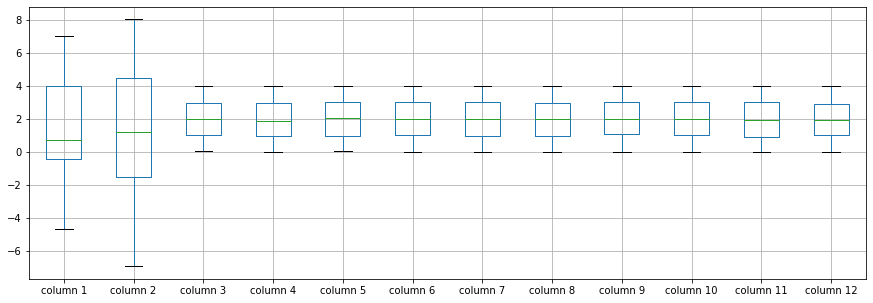

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1     1.488004
column 2     1.270950
column 3     1.980394
column 4     1.928367
column 5     1.990158
column 6     2.004594
column 7     1.959900
column 8     1.997668
column 9     1.989620
column 10    1.990993
column 11    1.945097
column 12    1.962809
dtype: float64

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12
column 1,1.000000,-0.435710,-0.018549,0.009105,0.039075,0.044184,-0.008026,0.021055,-0.009574,0.006240,0.028170,0.025025
column 2,-0.435710,1.000000,-0.009944,-0.022906,-0.034733,-0.007925,0.025772,-0.016423,-0.006188,-0.056638,-0.090613,0.014324
column 3,-0.018549,-0.009944,1.000000,-0.032330,0.076609,0.000206,0.027009,-0.003373,0.001319,-0.007225,-0.037678,0.011867
column 4,0.009105,-0.022906,-0.032330,1.000000,0.006561,-0.032938,0.037326,0.045369,-0.025529,0.048207,0.040783,-0.005093
column 5,0.039075,-0.034733,0.076609,0.006561,1.000000,0.053989,0.021349,0.005448,-0.007828,-0.010952,-0.002722,0.010466
column 6,0.044184,-0.007925,0.000206,-0.032938,0.053989,1.000000,-0.074993,0.041724,0.028824,0.010102,-0.039484,-0.000360
column 7,-0.008026,0.025772,0.027009,0.037326,0.021349,-0.074993,1.000000,-0.045032,-0.019679,-0.047660,-0.018831,-0.009594
column 8,0.021055,-0.016423,-0.003373,0.045369,0.005448,0.041724,-0.045032,1.000000,-0.058500,-0.054452,0.012308,-0.047250
column 9,-0.009574,-0.006188,0.001319,-0.025529,-0.007828,0.028824,-0.019679,-0.058500,1.000000,0.037263,-0.014363,-0.016542
column 10,0.006240,-0.056638,-0.007225,0.048207,-0.010952,0.010102,-0.047660,-0.054452,0.037263,1.000000,-0.073253,0.044871


In [8]:
#column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8','column 9','column 10','column 11','column 12']
#df = pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\incomplete\Incomplete Datasets Without Labels\4-gauss\4-gauss_AE_1.xlsx', header=None,names=column_names)


In [9]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [ ]:
imputer = md.Midas(layer_structure = [12,12+50,12+50+50,12+50+50+50,12+50+50+50+50,12+50+50+50+50+50,12+50+50+50+50,12+50+50+50,12+50+50,12+50,12], vae_layer = False, seed = 100)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [12]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 29.352958755493162
Epoch: 1 , loss: 29.112738800048827
Epoch: 2 , loss: 27.086545791625976
Epoch: 3 , loss: 23.634457626342773
Epoch: 4 , loss: 22.909929237365724
Epoch: 5 , loss: 22.66944808959961
Epoch: 6 , loss: 22.155375442504884
Epoch: 7 , loss: 21.761827850341795
Epoch: 8 , loss: 21.679771881103516
Epoch: 9 , loss: 21.32054340362549
Epoch: 10 , loss: 21.397668952941896
Epoch: 11 , loss: 21.01103630065918
Epoch: 12 , loss: 20.80953128814697
Epoch: 13 , loss: 20.678906440734863


In [ ]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

In [ ]:
new_df=imputations[-1]
new_df.iloc[21,:]


In [ ]:
complete_df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\complete\Original Datasets Without Labels\4-gauss.xlsx', header=None,names=column_names)

In [ ]:
new_df-complete_df

Calculating NRMSE Value

In [ ]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [ ]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [ ]:
numerator=Frobenius_norm(new_df-complete_df)
numerator

In [ ]:
denominator=Frobenius_norm(complete_df)
denominator

In [70]:
NRMS=numerator/denominator
NRMS


0.19564306396091646

In [18]:
new_df.iloc[66,:]

column 1     0.20762
column 2    -0.55052
column 3     2.33990
column 4     1.79480
column 5     1.40130
column 6     2.76580
column 7     1.30410
column 8     1.24930
column 9     1.05940
column 10    1.28430
column 11    1.87940
column 12    0.57524
Name: 66, dtype: float64

In [19]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12
0,-0.360190,0.161340,0.067351,3.53370,0.469590,0.67908,3.43440,2.79240,2.776300,1.699100,3.815600,1.746400
1,-0.098505,-0.178570,2.062800,2.92160,0.424720,1.17850,1.68020,1.38880,3.216700,2.923600,0.772910,0.641450
2,-0.169460,0.501530,2.470900,3.06500,1.567600,1.48240,0.92160,2.64240,1.518700,2.531800,2.432800,1.876800
3,-0.136050,0.472790,0.588090,1.95630,2.787000,2.59570,2.89330,1.53750,0.999420,3.659300,0.618250,3.265800
4,0.098830,0.234180,0.429700,1.63120,3.554100,2.27110,0.37425,2.17860,1.314000,1.063200,1.026900,2.188400
...,...,...,...,...,...,...,...,...,...,...,...,...
795,3.769000,-2.686700,1.576000,0.55612,0.070769,2.07470,0.80304,3.22290,3.493300,1.325500,3.231100,0.005387
796,3.466600,-4.034600,3.100400,1.34610,1.377300,2.28870,0.39613,2.39610,2.463500,1.667500,2.461700,1.226700
797,3.344800,-2.384300,2.031000,2.26460,3.341200,1.53700,1.22560,0.74027,2.495400,1.343300,1.622500,1.585300
798,3.441400,-5.216300,1.577000,1.84400,1.098700,3.42430,0.81081,3.72700,1.187900,0.951120,1.884500,1.143700


In [20]:
imputations[-1].to_excel("4-gauss_AE_5(imp).xlsx", index=False, header=False)